In [ ]:
import numpy as np
import nibabel as nib
import matplotlib
import matplotlib.pyplot as plt
filepath="patient01-05/patient01/patient01_T2W.nii.gz"
img_nifti = nib.load(filepath)
img = img_nifti.get_data()
print()
plt.plot(img[140,:])
plt.show()

In [ ]:
import numpy as np
import nibabel as nib
a = np.sin(np.linspace(0, np.pi, 20))
b = np.sin(np.linspace(0, np.pi*5, 20))
data = np.outer(a, b)[..., np.newaxis] * a
OrthoSlicer3D(data).show() 

In [ ]:
import nibabel as nib
import numpy as np

filepath="D:\\datasets\\3D_WML_MR\\patient01-05\\patient01\\patient01_T2W.nii.gz"
image = nib.load(filepath)

# to be extra sure of not overwriting data:
new_data = np.copy(image.get_data())
hd = image.header

# in case you want to remove nan:
new_data = np.nan_to_num(new_data)

# update data type:
new_dtype = np.int8  # for example to cast to int8.
new_data = new_data.astype(new_dtype)
image.set_data_dtype(new_dtype)

# if nifty1
if hd['sizeof_hdr'] == 348:
    print(1)
    new_image = nib.Nifti1Image(new_data, image.affine, header=hd)
# if nifty2
elif hd['sizeof_hdr'] == 540:
    print(2)
    new_image = nib.Nifti2Image(new_data, image.affine, header=hd)
else:
    raise IOError('Input image header problem')



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import skimage, os
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.misc
import numpy as np
from glob import glob
from skimage.io import imread



In [4]:
filepath="D:\\datasets\\3D_WML_MR\\"
BASE_IMG_PATH=os.path.join('..',filepath)
print(BASE_IMG_PATH)

D:\datasets\3D_WML_MR\


In [5]:
glob(os.path.join(BASE_IMG_PATH,'patient01-05','patient01','*T2W*.nii*'))

['D:\\datasets\\3D_WML_MR\\patient01-05\\patient01\\patient01_T2W.nii.gz']

(192, 512, 512)


Lossy conversion from float64 to uint8. Range [0.0, 325.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


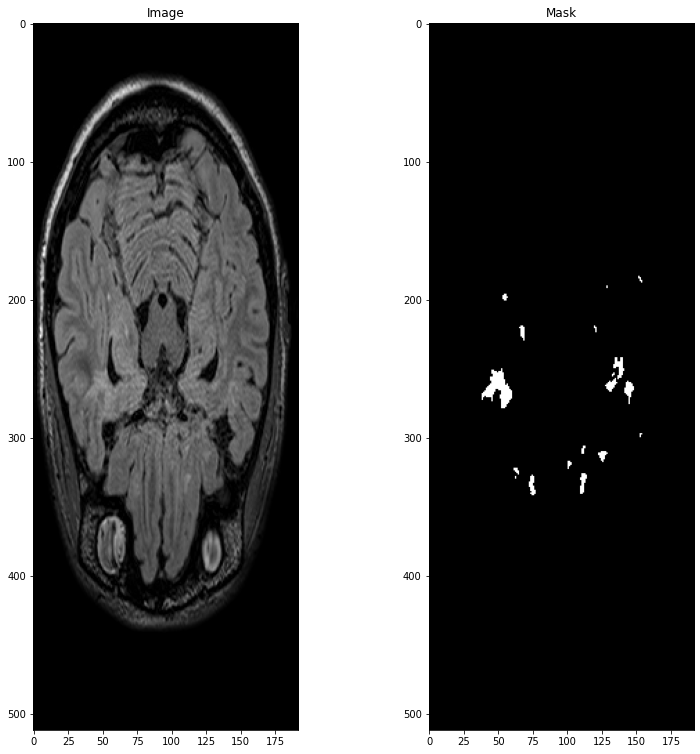

In [52]:
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')
    
from matplotlib import transforms

import imageio

test_image=nib.load(all_images[0]).get_fdata()
print(test_image.shape)
test_mask=nib.load(all_masks[0]).get_fdata()
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (13, 13))
i=250


im=test_image[:,:,i]
im=np.rot90(im)
ax1.imshow(im,cmap='gray')
ax1.set_title('Image')
imageio.imwrite("hh.png", im)


im=test_mask[:,:,i]
im=np.rot90(im,1)
ax2.imshow(im,cmap='gray')
ax2.set_title('Mask')
imageio.imwrite("maskhh.png", im)

D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_212_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_212_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_213_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_213_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_214_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_214_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_215_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_215_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_216_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_216_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_217_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_217_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_263_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_264_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_264_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_265_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_265_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_266_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_266_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_267_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_267_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_268_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_268_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_269_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_314_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_315_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_315_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_316_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_316_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_317_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_317_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_318_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_318_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_319_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_319_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_320_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_375_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_376_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_376_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_377_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_377_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_378_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_378_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_379_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_379_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_380_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_380_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient01_slices_381_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_219_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_220_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_220_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_221_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_221_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_222_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_222_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_223_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_223_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_224_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_224_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_225_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_270_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_271_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_271_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_272_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_272_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_273_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_273_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_274_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_274_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_275_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_275_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_276_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_327_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_328_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_328_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_329_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_329_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_330_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_330_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_331_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_331_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_332_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_332_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_333_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_388_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_389_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_389_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_390_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_390_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_391_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_391_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_392_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_392_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_393_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_393_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient04_slices_394_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_321_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_322_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_322_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_323_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_323_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_324_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_324_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_325_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_325_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_326_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_326_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_330_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_380_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_380_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_381_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_381_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_382_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_382_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_383_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_383_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_384_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_384_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_385_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient05_slices_385_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_306_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_307_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_307_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_308_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_308_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_309_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_309_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_310_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_310_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_311_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_311_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient06_slices_312_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_224_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_225_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_225_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_226_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_226_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_227_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_227_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_228_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_228_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_229_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_229_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_230_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_275_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_276_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_276_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_277_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_277_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_278_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_278_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_279_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_279_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_280_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_280_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_281_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_330_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_331_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_331_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_332_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_332_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_333_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_333_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_334_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_334_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_335_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_335_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient09_slices_336_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_241_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_242_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_242_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_243_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_243_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_244_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_244_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_245_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_245_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_246_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_246_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_247_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_294_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_295_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_295_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_296_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_296_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_297_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_297_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_298_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_298_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_299_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_299_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient10_slices_302_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_322_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_323_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_323_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_324_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_324_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_325_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_325_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_326_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_326_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_327_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_327_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient11_slices_328_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_298_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_299_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_299_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_300_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_300_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_301_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_301_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_302_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_302_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_303_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_303_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_304_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_352_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_353_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_353_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_354_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_354_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_355_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_355_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_356_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_356_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_357_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_357_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient12_slices_358_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_253_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_254_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_254_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_255_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_255_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_256_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_256_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_257_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_257_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_258_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_258_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_259_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_309_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_310_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_310_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_311_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_311_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_312_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_312_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_313_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_313_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_314_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_314_axial_flair.png saved.
D:\datasets\3dwmlmr3 secilmis\train/patient13_slices_315_axial_GTmask.png saved.
D:\datasets\3dwmlmr3 secilmis\trai

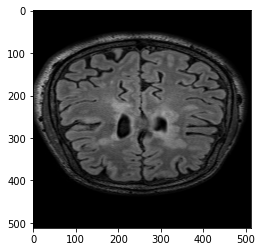

In [5]:
from glob import glob
from matplotlib import transforms
import imageio
import skimage, os
import matplotlib.pyplot as plt

def resizeAllImg(sourcePath,targetPath,witdh,height):
    all_images =sorted(glob(os.path.join(sourcePath,'*.png')))
    for item in all_images:
        sizeX=os.stat(item).st_size
        fname=os.path.basename(item)
        fnameA=fname.split("_")
        img = cv2.imread(item,cv2.COLOR_RGB2GRAY)
        res = cv2.resize(img, dsize=(witdh, height), interpolation=cv2.INTER_CUBIC)
        plt.imshow(res)
        imageio.imwrite(targetPath+"/"+fname, res)
        print(targetPath+"/"+fname+" saved.")


import cv2
sourcePath ="D:\\datasets\\3dwmlmr3 secilmis\\train2100"
targetPath ="D:\\datasets\\3dwmlmr3 secilmis\\train"
witdh  =512
height =512
s=resizeAllImg(sourcePath,targetPath,witdh,height)


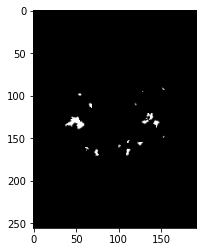

In [44]:



img = cv2.imread('maskhh.png')
res = cv2.resize(img, dsize=(192, 256), interpolation=cv2.INTER_LANCZOS4)
plt.imshow(res)
imageio.imwrite("maskhh2.png", res)

In [ ]:
from skimage.util import montage 
fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(montage(test_image), cmap ='gray', vmin=0, vmax=255)
fig.savefig('ct_scan.png')


In [ ]:
from skimage.util import montage 
fig, ax1 = plt.subplots(1, 1, figsize = (20, 20))
ax1.imshow(montage(test_mask), cmap ='bone', vmin=0, vmax=1)
fig.savefig('ct_scan_mask.png')


In [ ]:
try:
    import nibabel as nib
except:
    raise ImportError('Install NIBABEL')

In [ ]:
proxy_img=nib.load("C:\\Users\\msy\\Downloads\\someones_epi.nii.gz")

data = proxy_img.get_fdata(caching='fill')
data.shape

In [1]:
import cv2
import numpy as np
from PIL import Image, ImageCms
from skimage import color
import matplotlib
import matplotlib.pyplot as plt
src = cv2.imread("D:\\doc\\workspace\\maskT.png")

#print(src)

gray=cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
blur = cv2.blur(gray, (3, 3))
# binary thresholding of the image
ret, thresh = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)
        # ret, thresh = cv2.threshold(gray, 127, 255,0)

        # find contours
        # contours, hierarchy = cv2.findContours(thresh,2,1)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        # cc
cnt = sorted(contours, key=cv2.contourArea, reverse=True)
        # ROI will be object with biggest contour
mask = contours[0]
print(cnt)




[array([[[142, 262]],

       [[141, 263]],

       [[141, 264]],

       [[141, 265]],

       [[140, 266]],

       [[140, 267]],

       [[140, 268]],

       [[140, 269]],

       [[140, 270]],

       [[140, 271]],

       [[140, 272]],

       [[140, 273]],

       [[140, 274]],

       [[140, 275]],

       [[140, 276]],

       [[140, 277]],

       [[141, 278]],

       [[141, 279]],

       [[141, 280]],

       [[141, 281]],

       [[140, 282]],

       [[140, 283]],

       [[140, 284]],

       [[140, 285]],

       [[140, 286]],

       [[139, 287]],

       [[139, 288]],

       [[139, 289]],

       [[139, 290]],

       [[139, 291]],

       [[139, 292]],

       [[139, 293]],

       [[139, 294]],

       [[139, 295]],

       [[139, 296]],

       [[139, 297]],

       [[139, 298]],

       [[139, 299]],

       [[139, 300]],

       [[139, 301]],

       [[140, 302]],

       [[140, 303]],

       [[141, 304]],

       [[141, 305]],

       [[142, 306]],

       [[

['D:\\datasets\\3D_WML_MR\\patient01-05\\patient01\\patient01_FLAIR.nii.gz']
['D:\\datasets\\3D_WML_MR\\patient01-05\\patient01\\patient01_consensus_gt.nii.gz']
1  matching files found: D:\datasets\3D_WML_MR\patient01-05\patient01\patient01_FLAIR.nii.gz D:\datasets\3D_WML_MR\patient01-05\patient01\patient01_consensus_gt.nii.gz
(192, 512, 512)


Lossy conversion from float64 to uint8. Range [0.0, 310.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 284.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 251.0]. Convert image to uint8 prior to saving to suppress this warning.


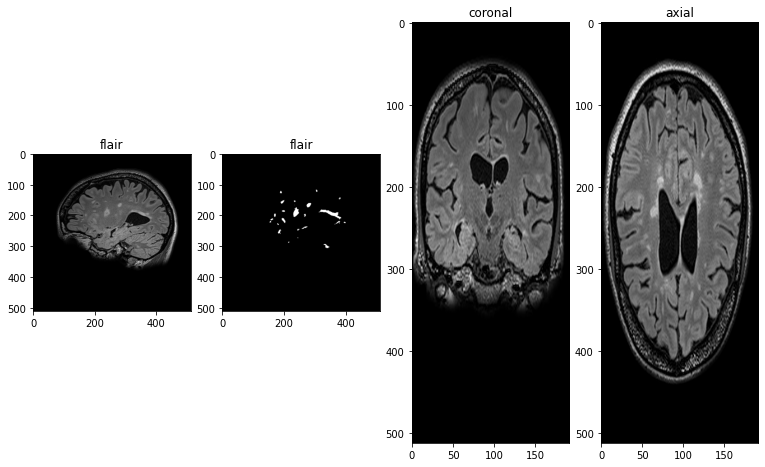

In [67]:
all_images=glob(os.path.join(BASE_IMG_PATH,'patient01-05','patient01','*FLAIR.nii*'))
print(all_images)
all_masks =glob(os.path.join(BASE_IMG_PATH,'patient01-05','patient01','*consensus_gt.nii*'))
print(all_masks)
#consensus_gt.nii
print(len(all_images),' matching files found:',all_images[0], all_masks[0])

from matplotlib import transforms

import imageio

test_image=nib.load(all_images[0]).get_fdata()
print(test_image.shape)
test_mask=nib.load(all_masks[0]).get_fdata()
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4, figsize = (13,13))

i=61
im=test_image[i]
im=np.rot90(im)
ax1.imshow(im,cmap='gray')
ax1.set_title('flair')
imageio.imwrite("patient01_sagittal_s70.png", im)

i=61
im=test_mask[i]
im=np.rot90(im)
ax2.imshow(im,cmap='gray')
ax2.set_title('flair')
imageio.imwrite("patient01_sagittalMask_s70.png", im)

i=270
im=test_image[:,i,:]
im=np.rot90(im)
ax3.imshow(im,cmap='gray')
ax3.set_title('coronal')
imageio.imwrite("patient01_coronal_s250.png", im)

i=340
im=test_image[:,:,i]
im=np.rot90(im)
ax4.imshow(im,cmap='gray')
ax4.set_title('axial')
imageio.imwrite("patient01_axial_s250.png", im)

